<a href="https://colab.research.google.com/github/Albert-hub09/Albert_Football/blob/main/Albert_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Albert_Football/Concussion Injuries 2012-2014.csv')

In [10]:
df.head()

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


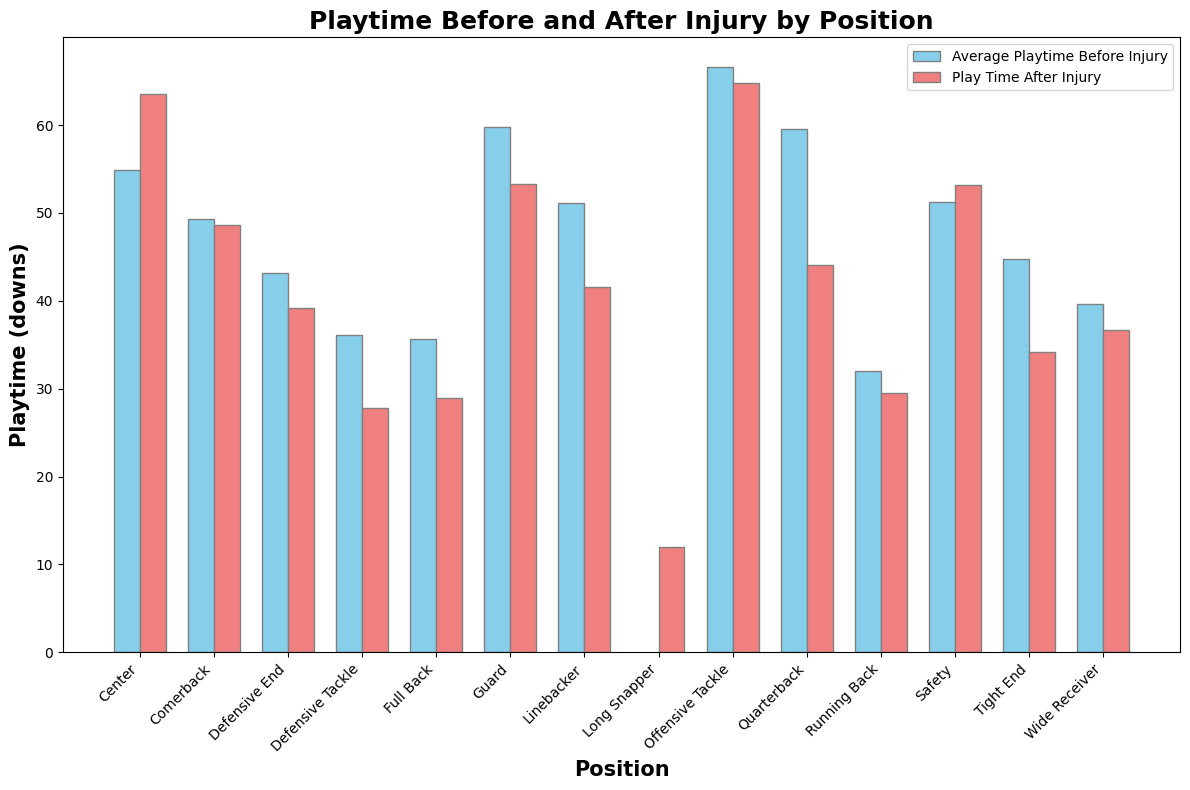

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Clean the data
df['Play Time After Injury'] = df['Play Time After Injury'].str.replace(' downs', '').str.replace('Did not return from injury', '0')
df['Average Playtime Before Injury'] = df['Average Playtime Before Injury'].str.replace(' downs', '').str.replace('Did not return from injury', '0')

# Convert to numeric, setting errors='coerce' will replace non-numeric values with NaN
df['Play Time After Injury'] = pd.to_numeric(df['Play Time After Injury'], errors='coerce')
df['Average Playtime Before Injury'] = pd.to_numeric(df['Average Playtime Before Injury'], errors='coerce')


# Group by position and calculate the mean
position_playtime = df.groupby('Position')[['Play Time After Injury', 'Average Playtime Before Injury']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Set position of bar on X axis
barWidth = 0.35
r1 = np.arange(len(position_playtime['Position']))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, position_playtime['Average Playtime Before Injury'], color='skyblue', width=barWidth, edgecolor='grey', label='Average Playtime Before Injury')
plt.bar(r2, position_playtime['Play Time After Injury'], color='lightcoral', width=barWidth, edgecolor='grey', label='Play Time After Injury')

# Add xticks on the middle of the group bars
plt.xlabel('Position', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(position_playtime['Position']))], position_playtime['Position'], rotation=45, ha="right")
plt.ylabel('Playtime (downs)', fontweight='bold', fontsize=15)
plt.title('Playtime Before and After Injury by Position', fontweight='bold', fontsize=18)

plt.legend()
plt.tight_layout()
plt.show()

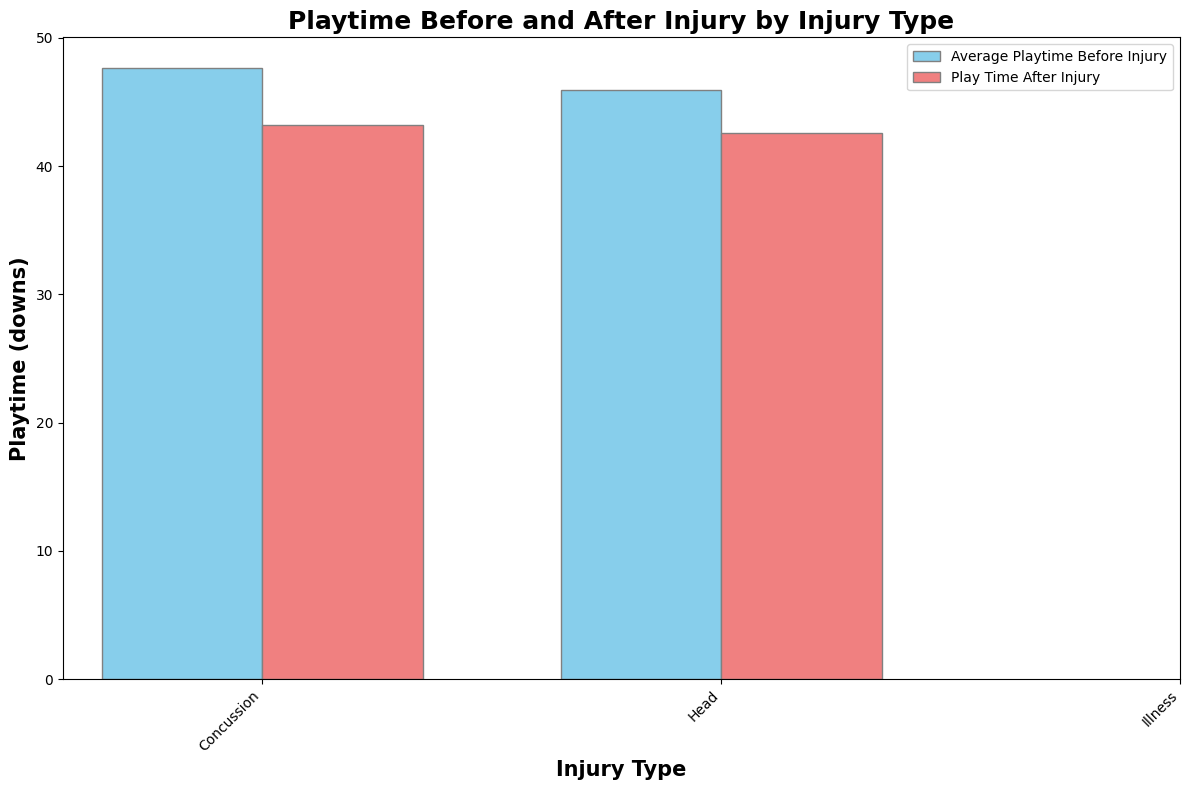

In [12]:
# Group by injury type and calculate the mean
injury_playtime = df.groupby('Reported Injury Type')[['Play Time After Injury', 'Average Playtime Before Injury']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Set position of bar on X axis
barWidth = 0.35
r1 = np.arange(len(injury_playtime['Reported Injury Type']))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, injury_playtime['Average Playtime Before Injury'], color='skyblue', width=barWidth, edgecolor='grey', label='Average Playtime Before Injury')
plt.bar(r2, injury_playtime['Play Time After Injury'], color='lightcoral', width=barWidth, edgecolor='grey', label='Play Time After Injury')

# Add xticks on the middle of the group bars
plt.xlabel('Injury Type', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth/2 for r in range(len(injury_playtime['Reported Injury Type']))], injury_playtime['Reported Injury Type'], rotation=45, ha="right")
plt.ylabel('Playtime (downs)', fontweight='bold', fontsize=15)
plt.title('Playtime Before and After Injury by Injury Type', fontweight='bold', fontsize=18)

plt.legend()
plt.tight_layout()
plt.show()